In [61]:
"""
Read in the metadata and merge with the novelty data
"""

data_dir = 'econ_data/precocity'
all_dfs = []

import pandas as pd
import os
import re
# Load metadata
df_meta = pd.read_csv('econ_data/econ_metadata/all-econ-S2metaWyearcol.tsv', sep='\t')
# Load all paper data files
print("Reading data files...")
for file in os.listdir(data_dir):
    if file.endswith('.tsv'):
        match = re.search(r'(\d{4})', os.path.basename(file))
        year = match.group(1) if match else 'unknown'
        # print(f"Processing {csv} (year: {year})")
        path = os.path.join(data_dir, file)
        df = pd.read_csv(path, sep='\t')
        df['paperId'] = df['docid']
        df['decade'] = year
        merged = df_meta.merge(df, on='paperId', how='left')
        all_dfs.append(merged)


gender_meta = pd.read_csv('econ_data/author_gender_econ.csv')
#read in the gender data we have already


Reading data files...


In [62]:
# pwd

In [63]:
all_dfs

[        index                                    id  \
 0           2   http://www.jstor.org/stable/1924813   
 1           3   http://www.jstor.org/stable/1808956   
 2           6  http://www.jstor.org/stable/40928444   
 3           9  http://www.jstor.org/stable/26616142   
 4          10   http://www.jstor.org/stable/2677880   
 ...       ...                                   ...   
 197214  90506  http://www.jstor.org/stable/30034621   
 197215  90507   http://www.jstor.org/stable/1885666   
 197216  90510  http://www.jstor.org/stable/44250315   
 197217  90515  http://www.jstor.org/stable/40928472   
 197218  90518  http://www.jstor.org/stable/26160275   
 
                                                     title  \
 0       U.S. Evidence on Linear Feedback from Money Gr...   
 1       Tariffs, Intermediate Goods, and Domestic Prot...   
 2       CAN RELAXATION OF BELIEFS RATIONALIZE THE WINN...   
 3         A FIELD EXPERIMENT IN MOTIVATING EMPLOYEE IDEAS   
 4       Simulat

In [64]:
#clean up the gender data
gender_meta = gender_meta[gender_meta['gender'].isin(['male', 'female'])]

# gender_meta = gender_meta[gender_meta['hand_gender'].isin(['male', 'female'])]




In [65]:
#put all the decades together

import pandas as pd

df_all = pd.concat(all_dfs, ignore_index=True)

In [66]:
"deduplicate the data by selecting one set of parameters ted recommended"

#filter for only male/female gender and also for the single set of novelty results (time chunks etc)

#chunks_used
    #use 0.25 (top 25% most novel chunks)
df_all = df_all.loc[df_all['chunks_used'] == 0.25]

#time_radius
    #use 20
df_all = df_all.loc[df_all['time_radius'] == 20]


#filtered
    #use trainauthquote
df_all = df_all.loc[df_all['filtered'] == 'trainauthquote']



#fraction_compared
    #10 percent most similar vs all articles... use all articles aka 1.0

df_all = df_all.loc[df_all['fraction_compared'] == 1.0]


#num_chunks
    #I don't think this one needed to be filtered?

In [67]:
# df_all = df_all[:1000]

In [68]:
df_all.head()

,index,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,...,date,num_chunks,fraction_compared,filtered,time_radius,chunks_used,precocity,novelty,transience,decade
24,24,http://www.jstor.org/stable/1907356,Inventory Fluctuations in Flaxseed and Linseed...,Econometrica,1954,10.2307/1907356,article,research-article,jstor,NaN,...,1954.0,26.0,1.0,trainauthquote,20.0,0.25,0.030531,-0.012232,-0.042763,1950
73,30,http://www.jstor.org/stable/1808097,Raw Materials: A Study of American Policy,The American Economic Review,1959,10.2307/1808097,article,book-review,jstor,NaN,...,1959.0,3.0,1.0,trainauthquote,20.0,0.25,0.002629,-0.017314,-0.019943,1950
131,62,http://www.jstor.org/stable/2976505,A Correction: A Positive Program for Federal D...,The Journal of Finance,1953,10.2307/2976505,article,research-article,jstor,NaN,...,1953.0,1.0,1.0,trainauthquote,20.0,0.25,0.013308,0.012646,-0.000662,1950
194,96,http://www.jstor.org/stable/1881919,The Marginal and Average Propensities to Consume,The Quarterly Journal of Economics,1954,10.2307/1881919,article,research-article,jstor,NaN,...,1954.0,16.0,1.0,trainauthquote,20.0,0.25,-0.001775,-0.020924,-0.019149,1950
243,100,http://www.jstor.org/stable/2976268,The Economics of Armament Inflation,The Journal of Finance,1952,10.2307/2976268,article,book-review,jstor,NaN,...,1952.0,3.0,1.0,trainauthquote,20.0,0.25,-0.010850,-0.015292,-0.004442,1950


In [69]:
#apply gender dict
gender_dict = pd.Series(gender_meta['gender'].values, index=gender_meta['author']).to_dict()
df_all['gender'] = df_all['creator'].map(gender_dict).fillna('unknown')
#
# gender_dict = pd.Series(gender_meta['hand_gender'].values, index=gender_meta['author']).to_dict()
# df_all['hand_gender'] = df_all['creator'].map(gender_dict).fillna('unknown')


In [70]:
def split_list(s):
    return s.split(';')


df_all['creator'] = df_all['creator'].map(split_list)



AttributeError: 'float' object has no attribute 'split'

In [28]:
# df_all['creator_list'] = ""
#
# for idx, row in df_all.iterrows():
#     creator_list =  split_list(row['creator'])
#     df_all.loc[idx, 'creator_list'] = creator_list


In [71]:
df_all.head()

,index,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,...,num_chunks,fraction_compared,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender
24,24,http://www.jstor.org/stable/1907356,Inventory Fluctuations in Flaxseed and Linseed...,Econometrica,1954,10.2307/1907356,article,research-article,jstor,NaN,...,26.0,1.0,trainauthquote,20.0,0.25,0.030531,-0.012232,-0.042763,1950,unknown
73,30,http://www.jstor.org/stable/1808097,Raw Materials: A Study of American Policy,The American Economic Review,1959,10.2307/1808097,article,book-review,jstor,NaN,...,3.0,1.0,trainauthquote,20.0,0.25,0.002629,-0.017314,-0.019943,1950,unknown
131,62,http://www.jstor.org/stable/2976505,A Correction: A Positive Program for Federal D...,The Journal of Finance,1953,10.2307/2976505,article,research-article,jstor,NaN,...,1.0,1.0,trainauthquote,20.0,0.25,0.013308,0.012646,-0.000662,1950,unknown
194,96,http://www.jstor.org/stable/1881919,The Marginal and Average Propensities to Consume,The Quarterly Journal of Economics,1954,10.2307/1881919,article,research-article,jstor,NaN,...,16.0,1.0,trainauthquote,20.0,0.25,-0.001775,-0.020924,-0.019149,1950,unknown
243,100,http://www.jstor.org/stable/2976268,The Economics of Armament Inflation,The Journal of Finance,1952,10.2307/2976268,article,book-review,jstor,NaN,...,3.0,1.0,trainauthquote,20.0,0.25,-0.010850,-0.015292,-0.004442,1950,unknown


In [72]:
# df_all['creator_list'].explode()
# df_all['creator'] = df_all['creator'].explode()

df_all = df_all.explode('creator')


In [73]:
df_all.to_csv('df_all_1st1000.csv')

In [74]:

# gender_stats_overall = (
#     df_all.groupby(['gender'], as_index=False)
#       .agg(
#           avg_precocity=('precocity', 'mean'),
#           avg_novelty=('novelty', 'mean'),
#           avg_citations=('citationCount', 'mean'),
#           n_docs=('creator', 'count')   # optional: number of docs per group
#       )
# )

In [75]:
df_clean_all = gender_stats_overall[gender_stats_overall['gender'].isin(['male', 'female'])]


NameError: name 'gender_stats_overall' is not defined

In [101]:
df_clean_all
df_clean_all.to_csv('df_stat.csv')

In [102]:
df_clean_all

,gender,avg_precocity,avg_novelty,avg_citations,n_docs
0,female,0.010465,-0.009653,98.742574,202
1,male,0.011210,-0.010974,186.323843,7130


In [83]:
author_groups = {}

for author, group in df_all.groupby('creator'):
    papers = group[['title','citationCount','novelty','precocity','year']].to_dict(orient='records')
    gender = group['gender'].iloc[0]
    author_groups[author] = {
        "gender": gender,
        "papers": papers
    }

# author_groups = {}
#
# # Make sure 'authors' is a string per row
# df_all['author_str'] = df_all['creator'].apply(
#     lambda x: x[0] if isinstance(x, list) and len(x) == 1 else ", ".join(x) if isinstance(x, list) else x
# )
#
# for author, group in df_all.groupby('author_str'):
#     papers = group[['title', 'isPartOf','citationCount', 'novelty', 'precocity', 'year']].to_dict(orient='records')
#     gender = group['hand_gender'].iloc[0] if 'hand_gender' in group.columns else 'unknown'
#
#     author_groups[author] = {
#         "hand_gender": gender,
#         "papers": papers
#     }


    # gender = group['gender'].iloc[0] if 'gender' in group.columns else 'unknown'
    #
    # author_groups[author] = {
    #     "gender": gender,
    #     "papers": papers
    # }



In [86]:
# author_groups.head()

AttributeError: 'dict' object has no attribute 'head'

In [87]:
#flatten data for regression analysis
#
# import pandas as pd
#
# rows = []
# for author, data in author_groups.items():
#     for paper in data['papers']:
#         row = {"author": author, "gender": data['gender'], **paper}
#         rows.append(row)
#
# df_flat = pd.DataFrame(rows)

# import pandas as pd
#
# rows = []
# for author, data in author_groups.items():
#     for paper in data['papers']:
#         row = {"author": author, "gender": data['gender_guessed'], **paper}
#         rows.append(row)
#
# df_flat = pd.DataFrame(rows)

import pandas as pd

rows = []
for author, data in author_groups.items():
    for paper in data['papers']:
        row = {"author": author, **paper}
        rows.append(row)

df_flat = pd.DataFrame(rows)



In [133]:
def simplify_gender(g):
    if g in ["female","mostly_female"]:
        return "female"
    if g in ["male","mostly_male"]:
        return "male"
    else:
        return "unknown"


In [116]:
df_flat['author_clean'] = df_flat['author'].str.replace(r'<prefix>.*?</prefix>', '', regex=True).str.strip()


In [117]:
df_flat['first_name'] = df_flat['author_clean'].str.split().str[0]


In [134]:
df_flat['gender_guessed'] = df_flat['first_name'].apply(simplify_gender)

In [135]:
for idx, row in df_flat.iterrows():
    gender = simplify_gender(str(row['first_name']))
    df_flat.at[idx, 'gender_guessed'] = gender

In [136]:
simplify_gender('Martin')

'unknown'

In [137]:
simplify_gender('Roy')


'unknown'

In [130]:
df_flat.head()

,author,title,citationCount,novelty,precocity,year,gender_guessed,log_citations,first_name,author_clean
0,<prefix>Bishop</prefix> C. Hunt,"The Joint-Stock Company in England, 1830-1844",19,0.013677,0.027051,1935,unknown,2.995732,C.,C. Hunt
1,<prefix>Mother</prefix> Martin Byrne,A Study of Creditor's Practices in the Financi...,0,-0.006001,0.024163,1959,unknown,0.000000,Martin,Martin Byrne
2,<prefix>Sir</prefix> Roy Harrod,Reassessment of Keynes's Views on Money,8,0.002254,-0.003499,1970,unknown,2.197225,Roy,Roy Harrod
3,<prefix>Sir</prefix> Roy Harrod,International Trade and Finance: Review Article,0,-0.006689,-0.000409,1967,unknown,0.000000,Roy,Roy Harrod
4,A. A. Brewer,A Three (or More) Factor Model of Growth with ...,1,-0.008734,-0.009105,1975,unknown,0.693147,A.,A. A. Brewer


In [138]:
df_flat.loc[df_flat['gender_guessed'] != 'unknown']

,author,title,citationCount,novelty,precocity,year,gender_guessed,log_citations,first_name,author_clean


In [91]:
df_flat.to_csv('author_groups_df_flat.csv')

In [92]:
df = df_flat

In [93]:
import statsmodels.formula.api as smf
import numpy as np

# optional: log-transform citations since they're skewed
df['log_citations'] = np.log1p(df['citationCount'])

# model 1: citations
model_cite = smf.ols(
    formula='log_citations ~ C(gender) + year',
    data=df
).fit()

print(model_cite.summary())

# model 2: novelty
model_nov = smf.ols(
    formula='novelty ~ C(gender) + year',
    data=df
).fit()

print(model_nov.summary())

# model 3: precocity
model_prec = smf.ols(
    formula='precocity ~ C(gender) + year',
    data=df
).fit()

print(model_prec.summary())


PatsyError: Number of rows mismatch between data argument and C(gender) (30041 versus 1)
    log_citations ~ C(gender) + year
                    ^^^^^^^^^

In [94]:
import statsmodels.formula.api as smf
import numpy as np

# optional: log-transform citations since they're skewed
df['log_citations'] = np.log1p(df['citationCount'])



In [18]:
import statsmodels.formula.api as smf

# Citations model
model_cite = smf.ols(
    formula='citationCount ~ C(gender) + year + C(isPartOf)',
    data=df
).fit()

print(model_cite.summary())

# Novelty model
model_nov = smf.ols(
    formula='novelty ~ C(gender) + year + C(isPartOf)',
    data=df
).fit()

print(model_nov.summary())

model_prec = smf.ols(
    formula='precocity ~ C(gender) + year + C(isPartOf)',
    data=df
).fit()

print(model_prec.summary())


                            OLS Regression Results                            
Dep. Variable:          citationCount   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     69.84
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          6.89e-142
Time:                        09:57:43   Log-Likelihood:            -2.4453e+05
No. Observations:               30041   AIC:                         4.891e+05
Df Residuals:                   30030   BIC:                         4.892e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [19]:

# Citation_counts ~ c(gender) + precocity + year + I(gender, precocity)


# Citations model
model_cite = smf.ols(
    formula='citationCount ~ C(gender) * precocity + year',
    data=df
).fit()

print(model_cite.summary())


                            OLS Regression Results                            
Dep. Variable:          citationCount   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          4.71e-132
Time:                        09:57:44   Log-Likelihood:            -2.4456e+05
No. Observations:               30041   AIC:                         4.891e+05
Df Residuals:                   30034   BIC:                         4.892e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [20]:

# Citation_counts ~ c(gender) + precocity + year + I(gender, precocity)


# Citations model
model_cite = smf.ols(
    formula='citationCount ~ C(gender) + C(gender) * precocity + year',
    data=df
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          citationCount   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          4.71e-132
Time:                        09:57:44   Log-Likelihood:            -2.4456e+05
No. Observations:               30041   AIC:                         4.891e+05
Df Residuals:                   30034   BIC:                         4.892e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [56]:
# A function that models the predictive effect of precocity on log(citations),
# while controlling for the effect of time.

def controlled_model(reg_df):

    X = []
    for idx, row in reg_df.iterrows():
        newrow = dict()
        newrow['precocity'] = row['precocity']
        newrow['novelty'] = row['novelty']
        newrow['precocity^2'] = row['precocity'] ** 2
        newrow['logcitations'] = row['logcitations']
        for yr in range(1920, 2000, 5):
            col = 'year' + str(yr)
            if col == 'year1940':
                continue
            if (row['date'] >= yr) and (row['date'] < yr + 5):
                newrow[col] = 1
            else:
                newrow[col] = 0
        X.append(newrow)

    X = pd.DataFrame(X)

    # Add a constant to the model (the intercept)
    X = sm.add_constant(X)

    # Define the dependent variable
    y = X['logcitations']

    X = X.drop('logcitations', axis=1)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the model
    print(model.summary())

def model_novelty_and_transience(reg_df):

    X = []
    for idx, row in reg_df.iterrows():
        newrow = dict()
        newrow['transience'] = row['transience']
        newrow['novelty'] = row['novelty']
        newrow['novelty^2'] = row['novelty'] ** 2
        newrow['transience^2'] = row['transience'] ** 2
        newrow['logcitations'] = row['logcitations']
        for yr in range(1920, 2000, 5):
            col = 'year' + str(yr)
            if (row['date'] >= yr) and (row['date'] < yr + 5):
                newrow[col] = 1
            else:
                newrow[col] = 0
        X.append(newrow)

    X = pd.DataFrame(X)

    # Add a constant to the model (the intercept)
    X = sm.add_constant(X)

    # Define the dependent variable
    y = X['logcitations']

    X = X.drop('logcitations', axis=1)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print the summary of the model
    print(model.summary())

In [57]:
# We also need a function to visualize results over time

def visualize_results(rlist, ryears):
    df = pd.DataFrame({'year': ryears, 'correlation': rlist})

    minvalue = 0 if min(df['correlation']) >= 0 else min(df['correlation']) - 0.02

    plt.figure(figsize=(10, 6))
    sns.lineplot(df, x='year', y='correlation', marker='o')

    plt.xlabel('Year')
    plt.ylabel('Correlation of precocity with log(citations)')
    plt.title('Strength of correlation')

    plt.ylim(minvalue, max(df['correlation']) + 0.02)

    if minvalue < 0:
        plt.axhline(0, linestyle='--', color='red')

    plt.show()

In [23]:
# model 1: citations
model_cite = smf.ols(
    formula='log_citations ~ C(gender) + year',
    data=df
).fit()

print(model_cite.summary())


                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     3521.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:57:44   Log-Likelihood:                -59280.
No. Observations:               30041   AIC:                         1.186e+05
Df Residuals:                   30037   BIC:                         1.186e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -108.5415 

In [24]:

# Citation_counts ~ c(gender) + precocity + year + I(gender, precocity)


# Citations model
model_cite = smf.ols(
    formula='citationCount ~ precocity + year',
    data=df
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          citationCount   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     314.1
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          1.02e-135
Time:                        09:57:44   Log-Likelihood:            -2.4457e+05
No. Observations:               30041   AIC:                         4.891e+05
Df Residuals:                   30038   BIC:                         4.892e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.095e+04    518.300    -21.122      0.0

In [25]:
# Citations model
model_cite = smf.ols(
    formula='citationCount ~  C(gender) * precocity + year',
    data=df
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          citationCount   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     105.5
Date:                Thu, 20 Nov 2025   Prob (F-statistic):          4.71e-132
Time:                        09:57:44   Log-Likelihood:            -2.4456e+05
No. Observations:               30041   AIC:                         4.891e+05
Df Residuals:                   30034   BIC:                         4.892e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [26]:
df['gender_binary'] = df['gender'].map({'male': 0, 'female': 1})


In [27]:
from scipy.stats import pointbiserialr
df_clean = df[['gender_binary', 'precocity']].dropna()

# df.dropna(inplace=True)

corr, pval = pointbiserialr(df_clean['gender_binary'], df_clean['precocity'])
print("Correlation:", corr)
print("p-value:", pval)


Correlation: -0.008794600630138765
p-value: 0.45148458845229067


In [28]:
df['gender_binary'].value_counts()


gender_binary
0.0    7130
1.0     202
Name: count, dtype: int64

In [29]:
df.groupby('gender_binary')['precocity'].std()


gender_binary
0.0    0.013868
1.0    0.014294
Name: precocity, dtype: float64

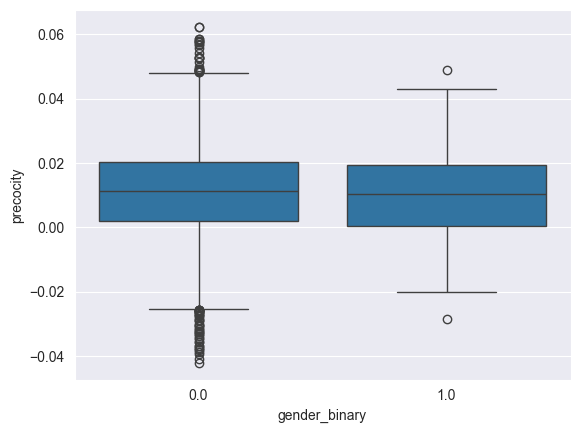

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='gender_binary', y='precocity', data=df)
plt.show()


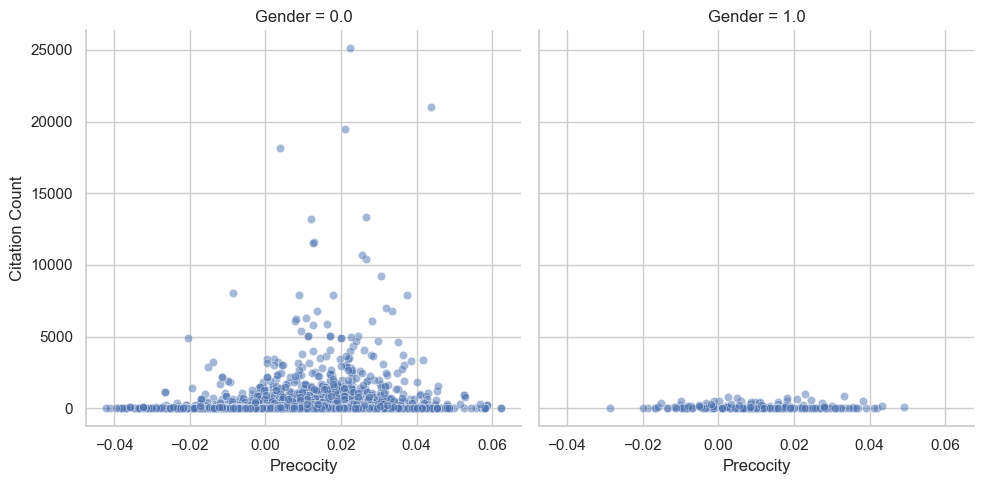

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.FacetGrid(df, col="gender_binary", height=5, aspect=1)
g.map_dataframe(sns.scatterplot, x="precocity", y="citationCount", alpha=0.5)

g.set_axis_labels("Precocity", "Citation Count")
g.set_titles("Gender = {col_name}")
plt.show()


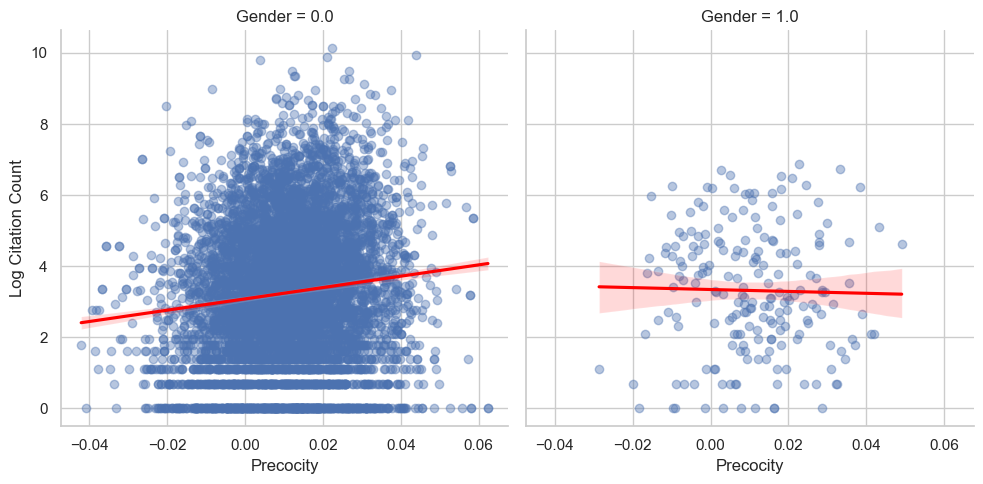

In [32]:
sns.set(style="whitegrid")

g = sns.FacetGrid(df, col="gender_binary", height=5, aspect=1)
g.map_dataframe(sns.regplot, x="precocity", y="log_citations",
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'})

g.set_axis_labels("Precocity", "Log Citation Count")
g.set_titles("Gender = {col_name}")
plt.show()


In [33]:

# Citation_counts ~ c(gender) + precocity + year + I(gender, precocity)


# Citations model
model_cite = smf.ols(
    formula='log_citations ~ precocity + gender + year',
    data=df
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2909.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:57:45   Log-Likelihood:                -58887.
No. Observations:               30041   AIC:                         1.178e+05
Df Residuals:                   30036   BIC:                         1.178e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -107.9359      1.08

In [34]:
# Citation_counts ~ c(gender) + precocity + year + I(gender, precocity) vbnjkfemale


# Citations model
model_cite = smf.ols(
    formula='log_citations ~ precocity * gender + year',
    data=df
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     1941.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:57:45   Log-Likelihood:                -58883.
No. Observations:               30041   AIC:                         1.178e+05
Df Residuals:                   30034   BIC:                         1.178e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [35]:
import statsmodels.formula.api as smf

male_model = smf.ols("citationCount ~ precocity + year", data=df[df.gender_binary==0]).fit()
female_model = smf.ols("citationCount ~ precocity + year", data=df[df.gender_binary==1]).fit()

print("Male model:\n", male_model.summary())
print("Female model:\n", female_model.summary())


Male model:
                             OLS Regression Results                            
Dep. Variable:          citationCount   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     73.70
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           2.08e-32
Time:                        09:57:45   Log-Likelihood:                -57680.
No. Observations:                7130   AIC:                         1.154e+05
Df Residuals:                    7127   BIC:                         1.154e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.089e+04   1042.225    -10

In [36]:
#what percentage of men vs women were in the wikidata?

In [107]:
df = df.dropna(subset=['hand_gender'])


In [108]:
# df = df[1000:]

In [35]:
# df = pd.read_csv('df_all_1st1000.csv')

In [109]:
# df = df[:1000]

In [96]:
df.head()

,author,title,citationCount,novelty,precocity,year,gender_guessed,log_citations
0,<prefix>Bishop</prefix> C. Hunt,"The Joint-Stock Company in England, 1830-1844",19,0.013677,0.027051,1935,unknown,2.995732
1,<prefix>Mother</prefix> Martin Byrne,A Study of Creditor's Practices in the Financi...,0,-0.006001,0.024163,1959,unknown,0.000000
2,<prefix>Sir</prefix> Roy Harrod,Reassessment of Keynes's Views on Money,8,0.002254,-0.003499,1970,unknown,2.197225
3,<prefix>Sir</prefix> Roy Harrod,International Trade and Finance: Review Article,0,-0.006689,-0.000409,1967,unknown,0.000000
4,A. A. Brewer,A Three (or More) Factor Model of Growth with ...,1,-0.008734,-0.009105,1975,unknown,0.693147


In [40]:
# import numpy as np
# import statsmodels.formula.api as smf
#
# #for the 1000 I hand-annotated gender based on names
# df['log_citations'] = np.log1p(df['citationCount'])
#
#
# # Citations model
# model_cite = smf.ols(
#     formula='log_citations ~ precocity * hand_gender + year',
#     data=df
# ).fit()
#
# print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.141
Date:                Fri, 21 Nov 2025   Prob (F-statistic):            0.00461
Time:                        13:34:55   Log-Likelihood:                -2994.4
No. Observations:                1439   AIC:                             6003.
Df Residuals:                    1432   BIC:                             6040.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [38]:
len(df.loc[df['hand_gender'] == 'unknown'])

1051

In [41]:
import gender_guesser.detector as gender

d = gender.Detector()

d.get_gender("Alice")   # 'female'
d.get_gender("John")    # 'male'
d.get_gender("Sasha")   # 'andy' (androgynous)


'mostly_male'

In [46]:
d.get_gender("Sasha")

'mostly_male'

In [44]:
d.get_gender("Alice")

'female'

In [97]:
import numpy as np
import statsmodels.formula.api as smf


# Citations model
model_cite = smf.ols(
    formula='log_citations ~ precocity * C(gender_guessed) + year',
    data=df
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     5799.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        13:47:39   Log-Likelihood:                -58902.
No. Observations:               30041   AIC:                         1.178e+05
Df Residuals:                   30038   BIC:                         1.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -107.6859      1.073   -100.387      0.0

In [140]:
df_all['author_clean'] = df_all['creator'].str.replace(r'<prefix>.*?</prefix>', '', regex=True).str.strip()

In [141]:
df_all['first_name'] = df_all['author_clean'].str.split().str[0]


In [152]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# df_all['gender'] = df_all['gender'].dropna()

df_all = df_all.dropna(subset=['gender'])
df_all = df_all.dropna(subset=['first_name'])

df_all = df_all.loc[df_all['gender'] != 'unknown']

# df should contain columns: "first_name" and "gender"
X = df_all["first_name"]
y = df_all["gender"]

model = Pipeline([
    ("vect", CountVectorizer(analyzer="char", ngram_range=(2,3))),  # character n-grams
    ("clf", LogisticRegression(max_iter=500))
])

model.fit(X, y)


Pipeline(steps=[('vect', CountVectorizer(analyzer='char', ngram_range=(2, 3))),
                ('clf', LogisticRegression(max_iter=500))])

In [153]:
df_all.head()

,index,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,...,filtered,time_radius,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name
608,261,http://www.jstor.org/stable/1883728,A Theoretical Note on the Dealer-Manufacturer ...,The Quarterly Journal of Economics,1959,10.2307/1883728,article,research-article,jstor,NaN,...,trainauthquote,20.0,0.25,0.001165,-0.016019,-0.017184,1950,male,Anthony Y. C. Koo,Anthony
667,286,http://www.jstor.org/stable/1825389,"Price Expectations, Money Illusion, and the Re...",Journal of Political Economy,1959,10.2307/1825389,article,research-article,jstor,NaN,...,trainauthquote,20.0,0.25,0.000183,-0.012277,-0.012460,1950,male,John H. Power,John
878,325,http://www.jstor.org/stable/2976308,Some Aspects of Demand for Consumer Durable Goods,The Journal of Finance,1954,10.2307/2976308,article,research-article,jstor,NaN,...,trainauthquote,20.0,0.25,0.007956,-0.024303,-0.032259,1950,male,Homer Jones,Homer
936,346,http://www.jstor.org/stable/1880611,John Rae on Economic Development: A Note,The Quarterly Journal of Economics,1959,10.2307/1880611,article,research-article,jstor,NaN,...,trainauthquote,20.0,0.25,0.019183,0.007455,-0.011728,1950,male,Joseph J. Spengler,Joseph
1387,518,http://www.jstor.org/stable/1925452,On the Predictive Value of Consumer Intentions...,The Review of Economics and Statistics,1959,10.2307/1925452,article,research-article,jstor,NaN,...,trainauthquote,20.0,0.25,0.005471,-0.020836,-0.026307,1950,male,James Tobin,James


In [154]:
model.predict(["Alice"])
# ['female']

# model.predict(["John"])
# ['male']


array(['female'], dtype=object)

In [156]:
def predict_gender(g):
    gender = model.predict(g)
    return gender


# df_all['gender_pred'] = df_all['first_name'].apply(predict_gender)
df_all['predicted_gender'] = model.predict(df_all['first_name'])


In [162]:
df_all.loc[df_all['predicted_gender'] == 'unknown']

,index,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,...,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name,predicted_gender,log_citations


In [163]:
df_all.loc[df_all['predicted_gender'] == 'female']


,index,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,...,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name,predicted_gender,log_citations
15382,6448,http://www.jstor.org/stable/1928279,Unemployment Statistics as a Basis for Employm...,The Review of Economics and Statistics,1950,10.2307/1928279,article,research-article,jstor,NaN,...,0.25,0.016236,-0.025077,-0.041313,1950,female,Gladys L. Palmer,Gladys,female,0.000000
38740,18301,http://www.jstor.org/stable/1827271,Capital Formation in Residential Real Estate,Journal of Political Economy,1958,10.2307/1827271,article,research-article,jstor,NaN,...,0.25,0.013334,-0.016315,-0.029649,1950,female,Margaret G. Reid,Margaret,female,4.043051
46167,22112,http://www.jstor.org/stable/2296002,The Production Function and the Theory of Capital,The Review of Economic Studies,1953,10.2307/2296002,article,research-article,jstor,NaN,...,0.25,-0.009861,-0.010495,-0.000634,1950,female,Joan Robinson,Joan,female,6.246107
76851,35433,http://www.jstor.org/stable/2975411,"Criteria of ""Adequate"" Governmental Expenditur...",The Journal of Finance,1951,10.2307/2975411,article,research-article,jstor,NaN,...,0.25,0.016160,-0.013542,-0.029702,1950,female,Alice John Vandermeulen,Alice,female,0.000000
97381,44713,http://www.jstor.org/stable/1905728,The Rate of Interest,Econometrica,1951,10.2307/1905728,article,research-article,jstor,NaN,...,0.25,0.001027,-0.006078,-0.007105,1950,female,Joan Robinson,Joan,female,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696843,63962,http://www.jstor.org/stable/1928671,A Short-Term Planning Model for the Indian Eco...,The Review of Economics and Statistics,1961,10.2307/1928671,article,research-article,jstor,NaN,...,0.25,0.006527,-0.014539,-0.021067,1960,female,Padma Desai,Padma,female,2.639057
1705666,67122,http://www.jstor.org/stable/2296316,Learning by Doing: A Further Note,The Review of Economic Studies,1963,10.2307/2296316,article,research-article,jstor,NaN,...,0.25,0.009448,0.008446,-0.001002,1960,female,Joan Robinson,Joan,female,1.386294
1714229,70390,http://www.jstor.org/stable/1879680,The Effects of Ad Valorem and Specific Taxes o...,The Quarterly Journal of Economics,1967,10.2307/1879680,article,research-article,jstor,NaN,...,0.25,0.007796,0.002008,-0.005789,1960,female,Alice John Vandermeulen,Alice,female,0.000000
1721469,73193,http://www.jstor.org/stable/1891128,The Basic Theory of Normal Prices,The Quarterly Journal of Economics,1962,10.2307/1891128,article,research-article,jstor,NaN,...,0.25,-0.008308,-0.001792,0.006515,1960,female,Joan Robinson,Joan,female,2.302585


In [157]:
df_all.head()

,index,id,title,isPartOf,publicationYear,doi,docType,docSubType,provider,collection,...,time_radius,chunks_used,precocity,novelty,transience,decade,gender,author_clean,first_name,predicted_gender
608,261,http://www.jstor.org/stable/1883728,A Theoretical Note on the Dealer-Manufacturer ...,The Quarterly Journal of Economics,1959,10.2307/1883728,article,research-article,jstor,NaN,...,20.0,0.25,0.001165,-0.016019,-0.017184,1950,male,Anthony Y. C. Koo,Anthony,male
667,286,http://www.jstor.org/stable/1825389,"Price Expectations, Money Illusion, and the Re...",Journal of Political Economy,1959,10.2307/1825389,article,research-article,jstor,NaN,...,20.0,0.25,0.000183,-0.012277,-0.012460,1950,male,John H. Power,John,male
878,325,http://www.jstor.org/stable/2976308,Some Aspects of Demand for Consumer Durable Goods,The Journal of Finance,1954,10.2307/2976308,article,research-article,jstor,NaN,...,20.0,0.25,0.007956,-0.024303,-0.032259,1950,male,Homer Jones,Homer,male
936,346,http://www.jstor.org/stable/1880611,John Rae on Economic Development: A Note,The Quarterly Journal of Economics,1959,10.2307/1880611,article,research-article,jstor,NaN,...,20.0,0.25,0.019183,0.007455,-0.011728,1950,male,Joseph J. Spengler,Joseph,male
1387,518,http://www.jstor.org/stable/1925452,On the Predictive Value of Consumer Intentions...,The Review of Economics and Statistics,1959,10.2307/1925452,article,research-article,jstor,NaN,...,20.0,0.25,0.005471,-0.020836,-0.026307,1950,male,James Tobin,James,male


In [161]:
df_all['log_citations'] = np.log1p(df_all['citationCount'])


# Citations model
model_cite = smf.ols(
    formula='log_citations ~  C(predicted_gender) * precocity + year',
    data=df_all
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     590.3
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:08:17   Log-Likelihood:                -14368.
No. Observations:                7332   AIC:                         2.875e+04
Df Residuals:                    7327   BIC:                         2.878e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [171]:
df_all['log_citations'] = np.log1p(df_all['citationCount'])


# Citations model
model_cite = smf.ols(
    formula='log_citations ~  C(gender) * precocity + year',
    data=df_all
).fit()

print(model_cite.summary())

                            OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     589.7
Date:                Fri, 21 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:37:21   Log-Likelihood:                -14368.
No. Observations:                7332   AIC:                         2.875e+04
Df Residuals:                    7327   BIC:                         2.878e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [164]:
valid_decades = list(range(1920, 2000, 10))

In [165]:
df_all['decade'] = (df_all['year'] // 10) * 10
df_filtered = df_all[df_all['decade'].isin(valid_decades)]


In [166]:
import statsmodels.api as sm

results = {}

for decade, df_decade in df_filtered.groupby('decade'):
    if len(df_decade) < 10:
        print(f"Skipping {decade}: not enough data")
        continue

    model = smf.ols(
        formula='log_citations ~ C(predicted_gender) * precocity + year',
        data=df_decade
    ).fit()

    results[decade] = model


In [167]:
for decade, model in results.items():
    print(f"Decade: {decade}")
    print(model.params, model.summary())
    print()


Decade: 1920
Intercept                               -149.986439
C(predicted_gender)[T.male]                0.227103
precocity                                 51.695443
C(predicted_gender)[T.male]:precocity    -54.452350
year                                       0.078494
dtype: float64                             OLS Regression Results                            
Dep. Variable:          log_citations   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.538
Date:                Fri, 21 Nov 2025   Prob (F-statistic):             0.0406
Time:                        16:29:42   Log-Likelihood:                -421.43
No. Observations:                 257   AIC:                             852.9
Df Residuals:                     252   BIC:                             870.6
Df Model:                           4                                         
C

In [168]:
import pandas as pd

rows = []

for decade, model in results.items():
    r2 = model.rsquared

    # Find the interaction term (gender * precocity)
    interaction_terms = [k for k in model.params.index if "precocity" in k and "C(predicted_gender)" in k]

    if len(interaction_terms) == 0:
        continue  # no interaction term found

    term = interaction_terms[0]  # usually only one

    pval = model.pvalues[term]

    rows.append((decade, r2, pval, term))

df_reg = pd.DataFrame(rows, columns=["decade", "r2", "pval", "term"])


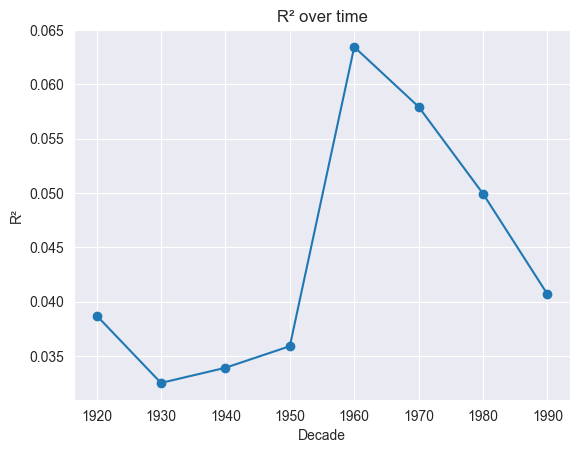

In [169]:
import matplotlib.pyplot as plt

plt.plot(df_reg['decade'], df_reg['r2'], marker='o')
plt.xlabel("Decade")
plt.ylabel("R²")
plt.title("R² over time")
plt.grid(True)
plt.show()


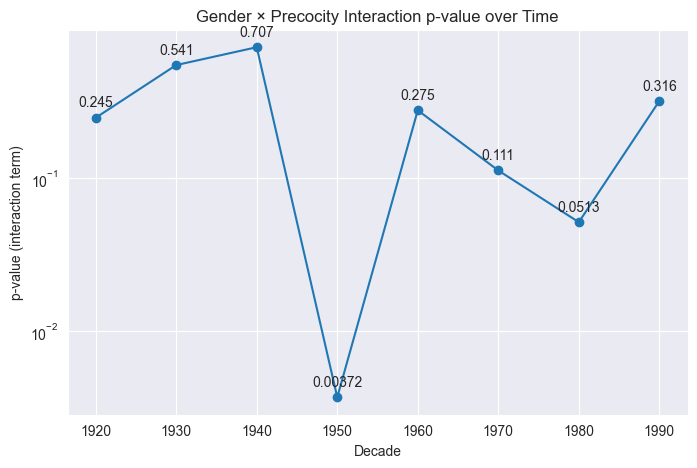

In [170]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.plot(df_reg['decade'], df_reg['pval'], marker='o')
plt.yscale('log')
plt.xlabel("Decade")
plt.ylabel("p-value (interaction term)")
plt.title("Gender × Precocity Interaction p-value over Time")
plt.grid(True)

# Annotation for each point
for decade, pval in zip(df_reg['decade'], df_reg['pval']):
    plt.annotate(f"{pval:.3g}",        # formats like 0.00234 → '0.00234'
                 (decade, pval),
                 textcoords="offset points",
                 xytext=(0, 8),       # slight vertical offset
                 ha='center')

plt.show()
